In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import percentile
from numpy import median
from numpy import abs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [2]:
# charger le dataset dans un DataFrame sans nom de colonnes
df = pd.read_csv('dataset_completnew.csv',sep=';', encoding='utf-8', header=None)

# renommer les colonnes en leur attribuant des noms
df = df.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK', 2: 'designationPRD',3: 'dateop',4: 'QUANTITE_TM'})

# afficher le DataFrame avec les colonnes renommées
print(df)

        DimDistrictFK  DimStructurePK      designationPRD  \
0       DimDistrictFK  DimStructurePK  DESIGNATIONPRODUIT   
1                 405            7218  ESSENCE SANS PLOMB   
2                 405            7218  ESSENCE SANS PLOMB   
3                 405            7218  ESSENCE SANS PLOMB   
4                 405            7218  ESSENCE SANS PLOMB   
...               ...             ...                 ...   
259664            416            7634             GAS OIL   
259665            416            7634             GAS OIL   
259666            416            7634             GAS OIL   
259667            416            7634             GAS OIL   
259668            416            7634             GAS OIL   

                         dateop  QUANTITE_TM  
0                          JOUR  quantite_tm  
1       2008-01-02 00:00:00.000       131,49  
2       2008-01-03 00:00:00.000       79,884  
3       2008-01-04 00:00:00.000      192,591  
4       2008-01-05 00:00:00.000 

C:\Users\abdel\AppData\Local\Temp\ipykernel_12412\121196607.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_completnew.csv',sep=';', encoding='utf-8', header=None)


In [3]:
df1 = df.drop([df.index[0]])

In [4]:
df = df1

In [5]:
#converting designation

df['designationPRD'] = df['designationPRD'].replace({'GAS OIL': 0, 'ESSENCE SANS PLOMB': 1})


In [6]:
df


,DimDistrictFK,DimStructurePK,designationPRD,dateop,QUANTITE_TM
1,405,7218,1,2008-01-02 00:00:00.000,"131,49"
2,405,7218,1,2008-01-03 00:00:00.000,"79,884"
3,405,7218,1,2008-01-04 00:00:00.000,"192,591"
4,405,7218,1,2008-01-05 00:00:00.000,"84,1965"
5,405,7218,1,2008-01-06 00:00:00.000,"231,165"
...,...,...,...,...,...
259664,416,7634,0,2022-12-27 00:00:00.000,"582,6141"
259665,416,7634,0,2022-12-28 00:00:00.000,"582,6972"
259666,416,7634,0,2022-12-29 00:00:00.000,"790,281"
259667,416,7634,0,2022-12-30 00:00:00.000,"447,078"


In [7]:
# Afficher toutes les valeurs uniques de la colonne 'DimStructurePK'
structures_pk = df['DimStructurePK'].unique()
print(structures_pk)

['7218' '7261' '7601' '7241' '7267' '7268' '7283' '7287' '7332' '7358'
 '7304' '7327' '7350' '7351' 7351 7298 7308 7314 7316 7208 7232 7340 7341
 7342 7343 7344 7385 7634]


In [8]:
# Remplacer les virgules par des points et convertir en float
df['QUANTITE_TM'] = df['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

# Afficher les types de données de chaque colonne dans le DataFrame
print(df.dtypes)

DimDistrictFK      object
DimStructurePK     object
designationPRD      int64
dateop             object
QUANTITE_TM       float64
dtype: object


In [9]:
# Sélectionner les lignes avec DimStructurePK = 7218 et designationPRD = 1
df7218 = df[(df['DimStructurePK'] == '7218') & (df['designationPRD'] == 0)]

# Garder uniquement les colonnes 'dateop' et 'QUANTITE_TM'
df7218 = df7218[['dateop', 'QUANTITE_TM']]

# Afficher le DataFrame df7218
print(df7218)


                        dateop  QUANTITE_TM
5308   2008-01-02 00:00:00.000     827.2605
5309   2008-01-03 00:00:00.000     524.3610
5310   2008-01-04 00:00:00.000     465.7755
5311   2008-01-05 00:00:00.000     532.6710
5312   2008-01-06 00:00:00.000     625.7430
...                        ...          ...
10650  2022-12-27 00:00:00.000     942.3540
10651  2022-12-28 00:00:00.000     939.0300
10652  2022-12-29 00:00:00.000     836.8170
10653  2022-12-30 00:00:00.000     644.8560
10654  2022-12-31 00:00:00.000     639.0390

[5347 rows x 2 columns]


In [10]:
df=df7218

In [11]:
# Calcule du Z-score pour chaque valeur de la variable "QUANTITE_TM"
z_scores = np.abs((df['QUANTITE_TM'] - df['QUANTITE_TM'].mean()) / df['QUANTITE_TM'].std())

# Définir le seuil pour la détection des outliers
threshold = 3

# Trouver les indices des outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")


Nombre d'outliers trouvés: 63


In [12]:
# Supprimer les lignes correspondant aux outliers
#df_clean = df.drop(outlier_indices)
df.reset_index(drop=True, inplace=True)
df_clean = df.drop(outlier_indices)

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées: {len(outlier_indices)}")

# Afficher les statistiques de la variable QUANTITE_TM après suppression des outliers
print(df_clean['QUANTITE_TM'].describe())

Nombre de lignes supprimées: 63
count    5284.000000
mean      854.818323
std       203.809785
min       198.609000
25%       708.843000
50%       849.282000
75%       999.900750
max      1493.307000
Name: QUANTITE_TM, dtype: float64


In [13]:
# Convertir la colonne 'dateop' en type de données datetime
df['dateop'] = pd.to_datetime(df['dateop'])

# Créer une nouvelle colonne 'mois' contenant le mois extrait de la colonne 'dateop'
df['dateop'] = df['dateop'].dt.to_period('M')

# Calculer la somme des valeurs de 'QUANTITE_TM' par mois
df = df.groupby('dateop')['QUANTITE_TM'].sum().reset_index()

# Afficher le DataFrame avec la somme de 'QUANTITE_TM' par mois
print(df)
df

      dateop  QUANTITE_TM
0    2008-01   17752.6530
1    2008-02   16384.4115
2    2008-03   17352.1110
3    2008-04   17345.4630
4    2008-05   17391.1680
..       ...          ...
174  2022-08   27574.2420
175  2022-09   24613.3890
176  2022-10   25441.0650
177  2022-11   24356.6100
178  2022-12   25803.7965

[179 rows x 2 columns]


,dateop,QUANTITE_TM
0,2008-01,17752.6530
1,2008-02,16384.4115
2,2008-03,17352.1110
3,2008-04,17345.4630
4,2008-05,17391.1680
...,...,...
174,2022-08,27574.2420
175,2022-09,24613.3890
176,2022-10,25441.0650
177,2022-11,24356.6100


In [14]:
#Transformer la variable de temps dateop en index du dataframe :
df = df.set_index('dateop')

In [15]:
df

,QUANTITE_TM
dateop,
2008-01,17752.6530
2008-02,16384.4115
2008-03,17352.1110
2008-04,17345.4630
2008-05,17391.1680
...,...
2022-08,27574.2420
2022-09,24613.3890
2022-10,25441.0650


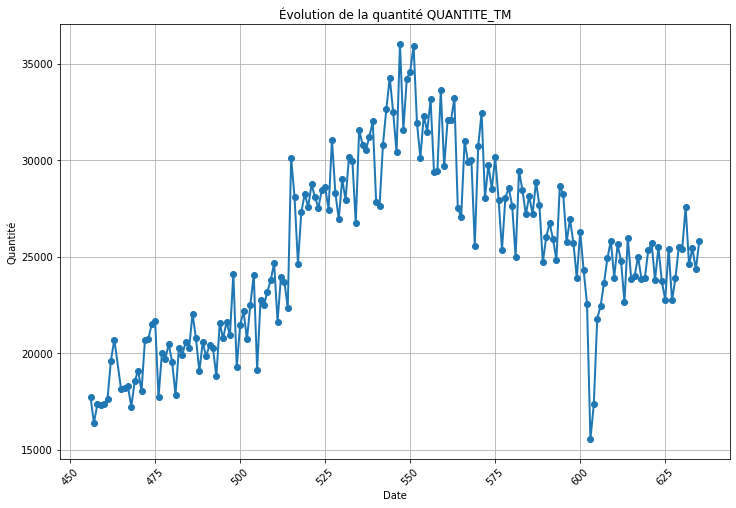

In [16]:
# Convertir l'index en valeurs numériques
df['dateop'] = df.index.astype('int')

# Tracer la courbe d'évolution
plt.figure(figsize=(12, 8))  
plt.plot(df['dateop'], df['QUANTITE_TM'], linewidth=2, marker='o', markersize=6)

# Ajouter des labels et un titre
plt.xlabel('Date')
plt.ylabel('Quantité')
plt.title('Évolution de la quantité QUANTITE_TM')

# Rotation des labels de l'axe x pour une meilleure lisibilité (facultatif)
plt.xticks(rotation=45)

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher la courbe
plt.show()

#si je me trompe pas w lahou A3lem f had la station kayen Trends et non stationnaire. so we need differincing  
#Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

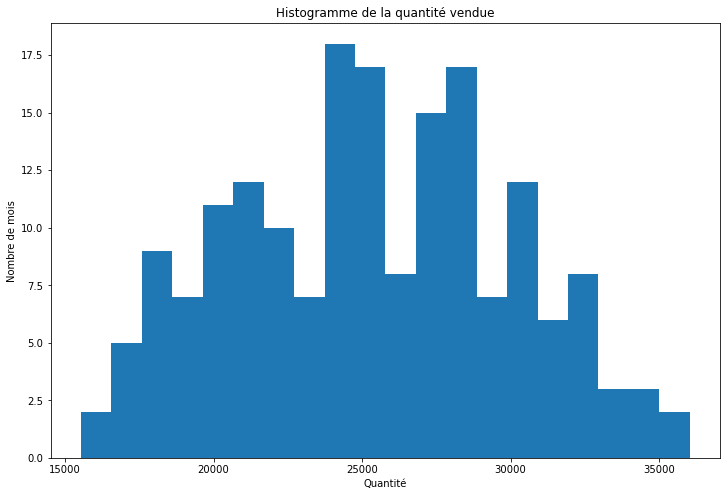

In [17]:
# Histogramme de la variable 'QUANTITE_TM'
plt.figure(figsize=(12, 8))  
plt.hist(df['QUANTITE_TM'], bins=20)
plt.title('Histogramme de la quantité vendue')
plt.xlabel('Quantité')
plt.ylabel('Nombre de mois')
plt.show()

C:\Users\abdel\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


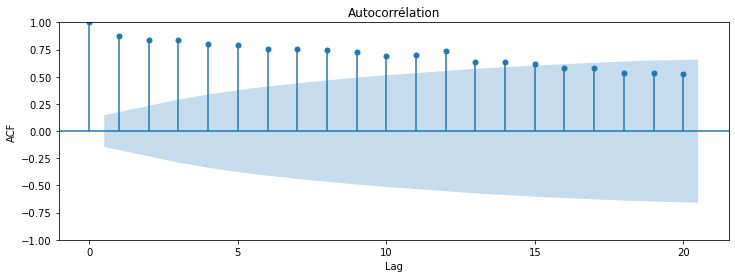

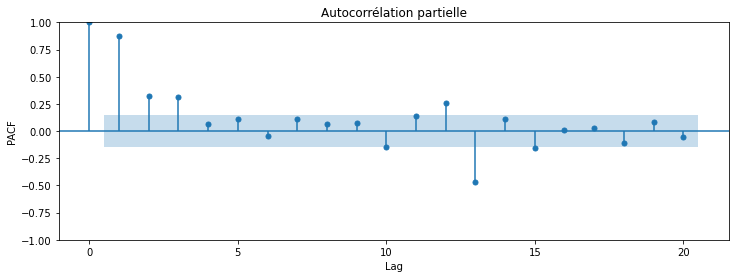

In [18]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Série temporelle
ts = df['QUANTITE_TM']

# Analyse ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(ts, lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrélation')

# Analyse PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(ts, lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Autocorrélation partielle')

plt.show()

#Ce code génère deux graphiques : l'ACF (autocorrélation) et la PACF (autocorrélation partielle) avec des lags allant jusqu'à 20. Vous pouvez ajuster la valeur de lags selon vos besoins. Les graphiques vous aideront à identifier les ordres AR, MA et I en fonction des valeurs significatives de corrélation dans les lags.

In [19]:
from statsmodels.tsa.stattools import acf
from scipy.stats import chi2

# Calculer l'autocorrélation jusqu'à un certain retard
lags = 10
acf_vals = acf(df['QUANTITE_TM'], nlags=lags)

# Calculer les statistiques Q et les p-valeurs
q_stats = len(df['QUANTITE_TM']) * (acf_vals**2)
p_values = 1 - chi2.cdf(q_stats, lags)

# Afficher les résultats numériques
for lag, q_stat, p_value in zip(range(1, lags+1), q_stats, p_values):
    print(f"Lag {lag}: Q-statistic = {q_stat:.4f}, p-value = {p_value:.4f}")


Lag 1: Q-statistic = 179.0000, p-value = 0.0000
Lag 2: Q-statistic = 136.3296, p-value = 0.0000
Lag 3: Q-statistic = 124.6603, p-value = 0.0000
Lag 4: Q-statistic = 124.9839, p-value = 0.0000
Lag 5: Q-statistic = 115.5074, p-value = 0.0000
Lag 6: Q-statistic = 111.4623, p-value = 0.0000
Lag 7: Q-statistic = 102.6646, p-value = 0.0000
Lag 8: Q-statistic = 101.3950, p-value = 0.0000
Lag 9: Q-statistic = 99.3588, p-value = 0.0000
Lag 10: Q-statistic = 95.8803, p-value = 0.0000


In [20]:
print("tester l'autocorrélation sur les données après différenciation. La différenciation est souvent utilisée pour supprimer les tendances et les saisonnalités présentes dans les données, ce qui permet de rendre les données stationnaires. En appliquant le test d'autocorrélation sur les données différenciées, vous pouvez vérifier si les autocorrélations significatives ont été éliminées.Si après différenciation, les autocorrélations significatives sont éliminées ou réduites, cela indiquerait que les tendances et les saisonnalités ont été en grande partie supprimées. Cela suggérerait que vous pouvez poursuivre l'analyse et la modélisation en utilisant les données différenciées.Cependant, si vous constatez que même après différenciation, des autocorrélations significatives persistent, cela peut indiquer que d'autres motifs ou structures temporelles sont présents dans les données. Dans ce cas, vous pouvez envisager d'explorer d'autres techniques de modélisation qui peuvent mieux capturer ces motifs, tels que les modèles ARIMA saisonniers.")

tester l'autocorrélation sur les données après différenciation. La différenciation est souvent utilisée pour supprimer les tendances et les saisonnalités présentes dans les données, ce qui permet de rendre les données stationnaires. En appliquant le test d'autocorrélation sur les données différenciées, vous pouvez vérifier si les autocorrélations significatives ont été éliminées.Si après différenciation, les autocorrélations significatives sont éliminées ou réduites, cela indiquerait que les tendances et les saisonnalités ont été en grande partie supprimées. Cela suggérerait que vous pouvez poursuivre l'analyse et la modélisation en utilisant les données différenciées.Cependant, si vous constatez que même après différenciation, des autocorrélations significatives persistent, cela peut indiquer que d'autres motifs ou structures temporelles sont présents dans les données. Dans ce cas, vous pouvez envisager d'explorer d'autres techniques de modélisation qui peuvent mieux capturer ces moti

In [21]:
# Vérifier si les données sont stationnaires
# Ici, nous utilisons le test augmenté de Dickey-Fuller (ADF) pour tester la stationnarité
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Effectuer le test ADF
    result = adfuller(timeseries)
    
    # Extraire les valeurs de test et comparer avec les valeurs critiques
    test_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Afficher les résultats
    print('Résultats du test de Dickey-Fuller Augmenté :')
    print(f'   Test Statistic : {test_statistic}')
    print(f'   p-value : {p_value}')
    print(f'   Valeurs Critiques :')
    for key, value in critical_values.items():
        print(f'      {key}: {value}')
    
    # Interprétation des résultats
    if p_value <= 0.05:
        print('Les données sont stationnaires (p-value <= 0.05)')
    else:
        print('Les données ne sont pas stationnaires (p-value > 0.05)')

# Appliquer le test de stationnarité sur la colonne cible 'QUANTITE_TM'
test_stationarity(df['QUANTITE_TM'])

Résultats du test de Dickey-Fuller Augmenté :
   Test Statistic : -1.8649154589888544
   p-value : 0.3487416302015731
   Valeurs Critiques :
      1%: -3.47086589632514
      5%: -2.879330279087651
      10%: -2.57625492712671
Les données ne sont pas stationnaires (p-value > 0.05)


In [22]:
# Diviser les données en deux jeux de données : un ensemble d'entraînement et un ensemble de test
train = list(df.loc['2008-01-01':'2021-12-31']['QUANTITE_TM'])
test = list(df.loc[df.index > '2021-12-31']['QUANTITE_TM'])


In [23]:
# Supprimer la colonne "dateop"
df = df.drop('dateop', axis=1)


In [24]:
df

,QUANTITE_TM
dateop,
2008-01,17752.6530
2008-02,16384.4115
2008-03,17352.1110
2008-04,17345.4630
2008-05,17391.1680
...,...
2022-08,27574.2420
2022-09,24613.3890
2022-10,25441.0650


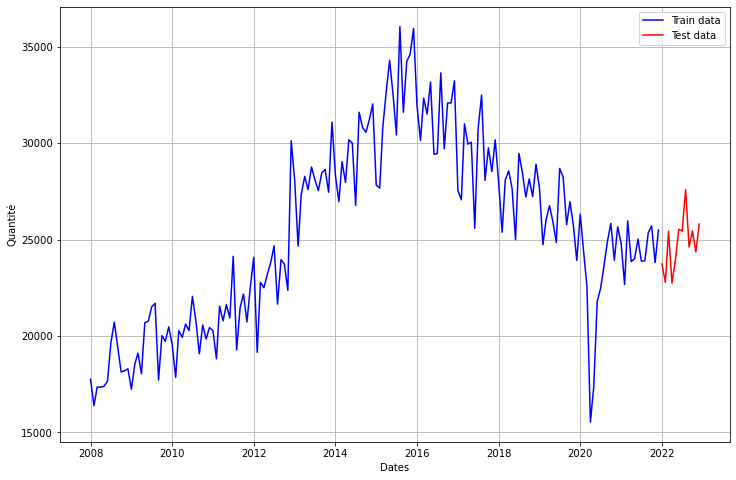

In [25]:
# Convertir l'index en objets Timestamp
df.index = df.index.to_timestamp()

# Tracer la courbe d'évolution
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Quantité')
plt.plot(df.loc['2008-01-01':'2021-12-31']['QUANTITE_TM'], 'blue', label="Train data")
plt.plot(df.loc[df.index > '2021-12-31']['QUANTITE_TM'], 'red', label="Test data")

plt.legend()

# Afficher la courbe
plt.show()

In [26]:
# Appliquer la différenciation
df_diff = df.diff().dropna()

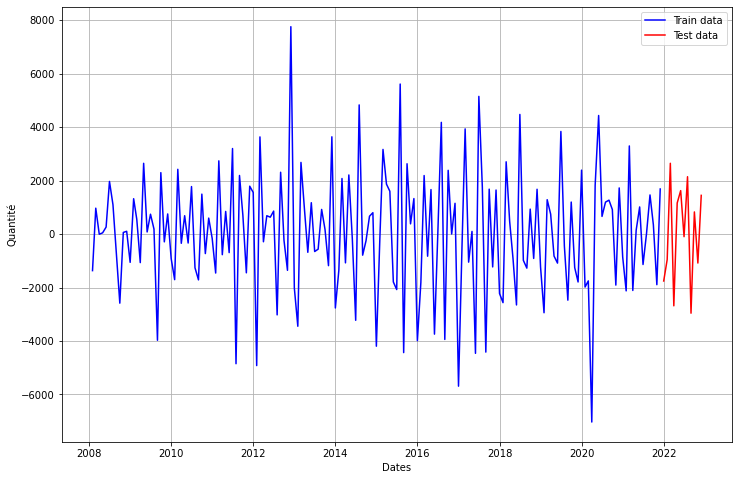

In [27]:
# Convertir l'index en objets Timestamp
#df_diff.index = df_diff.index.to_timestamp()

# Tracer la courbe d'évolution
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Quantité')
plt.plot(df_diff.loc['2008-01-01':'2021-12-31']['QUANTITE_TM'], 'blue', label="Train data")
plt.plot(df_diff.loc[df_diff.index >= '2021-12-31']['QUANTITE_TM'], 'red', label="Test data")


plt.legend()

# Afficher la courbe
plt.show()

In [28]:
# Vérifier si les données sont stationnaires
# Ici, nous utilisons le test augmenté de Dickey-Fuller (ADF) pour tester la stationnarité
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Effectuer le test ADF
    result = adfuller(timeseries)
    
    # Extraire les valeurs de test et comparer avec les valeurs critiques
    test_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Afficher les résultats
    print('Résultats du test de Dickey-Fuller Augmenté :')
    print(f'   Test Statistic : {test_statistic}')
    print(f'   p-value : {p_value}')
    print(f'   Valeurs Critiques :')
    for key, value in critical_values.items():
        print(f'      {key}: {value}')
    
    # Interprétation des résultats
    if p_value <= 0.05:
        print('Les données sont stationnaires (p-value <= 0.05)')
    else:
        print('Les données ne sont pas stationnaires (p-value > 0.05)')

# Appliquer le test de stationnarité sur la colonne cible 'QUANTITE_TM'
test_stationarity(df_diff['QUANTITE_TM'])

Résultats du test de Dickey-Fuller Augmenté :
   Test Statistic : -3.1206509774070255
   p-value : 0.025062192926643054
   Valeurs Critiques :
      1%: -3.47086589632514
      5%: -2.879330279087651
      10%: -2.57625492712671
Les données sont stationnaires (p-value <= 0.05)


In [29]:
# Diviser les données en deux jeux de données : un ensemble d'entraînement et un ensemble de test
train_diff = list(df_diff.loc['2008-01-01':'2021-12-31']['QUANTITE_TM'])
test_diff = list(df_diff.loc[df_diff.index >= '2021-12-31']['QUANTITE_TM'])


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
QNT = df_diff['QUANTITE_TM']
# Utilisation de l'auto-arima pour obtenir les meilleurs paramètres
stepwise_model = auto_arima(QNT, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12, d=1,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3188.363, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3421.543, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3287.360, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3419.549, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3174.558, Time=0.51 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=3205.111, Time=0.94 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=3172.376, Time=0.93 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3288.027, Time=0.36 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=inf, T

In [32]:
model_predictions= []
n_test_obser = len(test_diff)

In [33]:
for i in range(n_test_obser):
    model = SARIMAX(train_diff, order=(1, 1, 1), seasonal_order=(2, 0, 0, 12))
    model_fit = model.fit()
    output = model_fit.forecast()
    prediction = output[0]
    model_predictions.append(prediction)

    # Mettre à jour la série de données d'entraînement pour inclure la nouvelle observation
    train_diff.append(test_diff[i])

# Afficher toutes les prédictions
print(model_predictions)

C:\Users\abdel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[-774.384917066101, -732.044201598372, 1958.2032724414885, -897.3045297652725, 552.0692030218006, 50.520834818446474, -982.3312866561614, -155.31471844673115, 177.54048936641584, 1339.5295375115797, -1162.6693360500933, 928.2369065358998]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2008-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QUANTITE_TM  179 non-null    float64
dtypes: float64(1)
memory usage: 6.9 KB


In [35]:
predictions_original_scale = []
last_train_value = df.iloc[-1]['QUANTITE_TM']

for diff_prediction in model_predictions:
    prediction = last_train_value + diff_prediction
    predictions_original_scale.append(prediction)
    last_train_value = prediction



In [36]:
print(predictions_original_scale)

[25029.4115829339, 24297.367381335527, 26255.570653777017, 25358.266124011745, 25910.335327033546, 25960.856161851993, 24978.52487519583, 24823.2101567491, 25000.750646115517, 26340.280183627096, 25177.610847577, 26105.847754112903]


In [37]:
from sklearn.metrics import mean_squared_error

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(test, predictions_original_scale))
print('RMSE:', rmse)



RMSE: 1449.4942699975434


<function matplotlib.pyplot.show(close=None, block=None)>

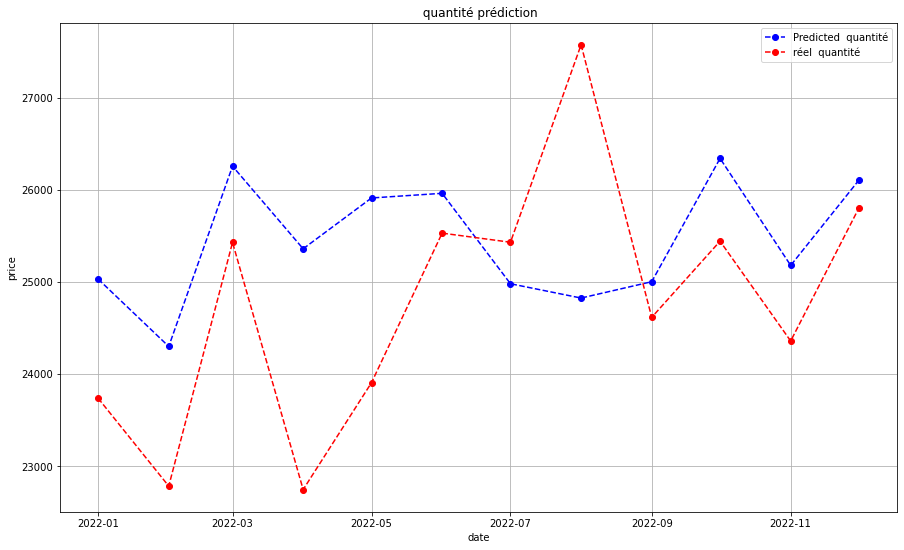

In [38]:
plt.figure(figsize = (15,9))
plt.grid(True)

date_range = df.loc[df.index > '2021-12-31']['QUANTITE_TM'].index

plt.plot(date_range, predictions_original_scale, color="blue", marker = "o", linestyle="dashed", label="Predicted  quantité")
plt.plot(date_range, test, color="red", marker = "o", linestyle="dashed", label="réel  quantité")

plt.title(" quantité prédiction")
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show



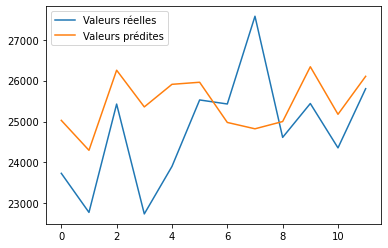

In [39]:
import matplotlib.pyplot as plt

plt.plot(test, label='Valeurs réelles')
plt.plot(predictions_original_scale, label='Valeurs prédites')
plt.legend()
plt.show()

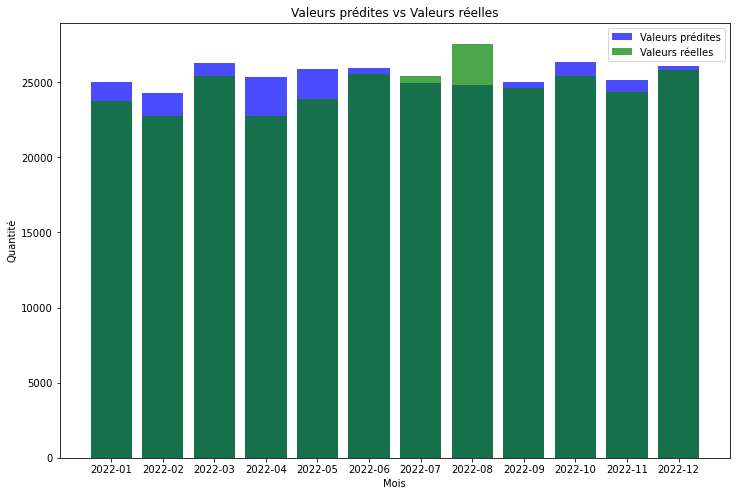

RMSE: 1449.4942699975434
R-squared: -0.20574364111439292


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Convertir les dates de l'index en objets de type 'Period' et les convertir en chaînes de caractères
months = df.loc[df.index > '2021-12-31'].index.to_period('M').astype(str)

# Calculer les métriques d'évaluation
rmse = np.sqrt(mean_squared_error(test,predictions_original_scale ))
r2 = r2_score(test, predictions_original_scale)

# Tracer les barres pour chaque mois
plt.figure(figsize=(12, 8))
plt.bar(months, predictions_original_scale, color='blue', alpha=0.7, label='Valeurs prédites')
plt.bar(months, test, color='green', alpha=0.7, label='Valeurs réelles')

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Quantité')
plt.title('Valeurs prédites vs Valeurs réelles')
plt.legend()

# Afficher le graphique
plt.show()

# Afficher les métriques d'évaluation
print("RMSE:", rmse)
print("R-squared:", r2)





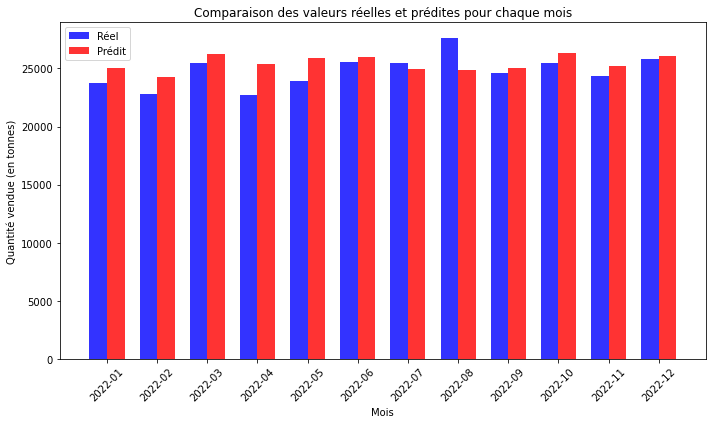

RMSE: 1449.4942699975434
MAE: 1192.141944202609


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les données
y_true = test
y_pred = predictions_original_scale
months = df.loc[df.index > '2021-12-31'].index.to_period('M').astype(str)
months = months

# Créer la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres pour les valeurs réelles et prédites
bar_width = 0.35
opacity = 0.8
index = np.arange(len(months))
rects1 = ax.bar(index, y_true, bar_width, alpha=opacity, color='b', label='Réel')
rects2 = ax.bar(index + bar_width, y_pred, bar_width, alpha=opacity, color='r', label='Prédit')

# Ajouter des étiquettes, un titre et une légende
ax.set_xlabel('Mois')
ax.set_ylabel('Quantité vendue (en tonnes)')
ax.set_title('Comparaison des valeurs réelles et prédites pour chaque mois')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months, rotation=45)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

mae = mean_absolute_error(y_true, y_pred)
print('MAE:', mae)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



# Forecasting the data of 2023

In [44]:
d23 = pd.read_csv('Dataset_2023.csv',sep=';', encoding='utf-8', header=None)

In [45]:
d23 = d23.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK', 2: 'designationPRD',3: 'DimClientPK',4: 'SA',5: 'dateop',6: 'QUANTITE_TM'})
d23

,DimDistrictFK,DimStructurePK,designationPRD,DimClientPK,SA,dateop,QUANTITE_TM
0,dimDistrictPK,dimStructurePK,designationPRD,DimClientPK,SA,dateop,quantiteTM
1,405,7218,ESSENCE SANS PLOMB,366,22,2023-01-01 00:00:00.000,5.156200
2,405,7218,ESSENCE SANS PLOMB,2063,22,2023-01-01 00:00:00.000,9.575800
3,405,7218,GAS OIL,2063,22,2023-01-01 00:00:00.000,22.437000
4,405,7218,ESSENCE SANS PLOMB,3509,22,2023-01-01 00:00:00.000,10.312400
...,...,...,...,...,...,...,...
119572,416,7634,GAS OIL,457997,60,2023-03-31 00:00:00.000,44.874000
119573,416,7634,GAS OIL,458000,60,2023-03-31 00:00:00.000,22.437000
119574,416,7634,GAS OIL,458410,5,2023-03-31 00:00:00.000,89.748000
119575,416,7634,GAS OIL,515341,30,2023-03-31 00:00:00.000,426.303000


In [46]:
d23 = d23.drop(0)

In [47]:
#converting designation

d23['designationPRD'] = d23['designationPRD'].replace({'GAS OIL': 0, 'ESSENCE SANS PLOMB': 1})


In [48]:
# Remplacer les virgules par des points et convertir en float
d23['QUANTITE_TM'] = d23['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

# Afficher les types de données de chaque colonne dans le DataFrame
print(d23.dtypes)

DimDistrictFK      object
DimStructurePK     object
designationPRD      int64
DimClientPK        object
SA                 object
dateop             object
QUANTITE_TM       float64
dtype: object


In [49]:
# Sélectionner les lignes avec DimStructurePK = 7218 et designationPRD = 1
d23_7218 = d23[(d23['DimStructurePK'] == '7218') & (d23['designationPRD'] == 0)]

# Garder uniquement les colonnes 'dateop' et 'QUANTITE_TM'
d23_7218 = d23_7218[['dateop', 'QUANTITE_TM']]

# Afficher le DataFrame df7218
print(d23_7218)

                         dateop  QUANTITE_TM
3       2023-01-01 00:00:00.000       22.437
6       2023-01-01 00:00:00.000       12.465
8       2023-01-01 00:00:00.000       22.437
9       2023-01-01 00:00:00.000       22.437
10      2023-01-01 00:00:00.000       22.437
...                         ...          ...
118937  2023-03-31 00:00:00.000       44.874
118939  2023-03-31 00:00:00.000       20.775
118941  2023-03-31 00:00:00.000       24.930
118942  2023-03-31 00:00:00.000       24.930
118944  2023-03-31 00:00:00.000       22.437

[3561 rows x 2 columns]


In [50]:
d23 = d23_7218

In [51]:
# Convertir la colonne 'dateop' en type de données datetime
d23['dateop'] = pd.to_datetime(d23['dateop'])

# Créer une nouvelle colonne 'mois' contenant le mois extrait de la colonne 'dateop'
d23['dateop'] = d23['dateop'].dt.to_period('M')

# Calculer la somme des valeurs de 'QUANTITE_TM' par mois
d23 = d23.groupby('dateop')['QUANTITE_TM'].sum().reset_index()

# Afficher le DataFrame avec la somme de 'QUANTITE_TM' par mois
d23

,dateop,QUANTITE_TM
0,2023-01,24720.347841
1,2023-02,23318.691000
2,2023-03,25826.649000


In [52]:
#Transformer la variable de temps dateop en index du dataframe :
d23 = d23.set_index('dateop')

In [53]:
d23_0 = d23.drop('QUANTITE_TM', axis=1)

In [54]:
# Obtenir les valeurs prédites
valeurs_predites = model_fit.forecast(steps=len(d23_0))

# Afficher les valeurs prédites
print(valeurs_predites)

[ 928.23690654 -926.25002551 -448.57930719]


In [55]:
d23['Predictions'] = valeurs_predites
d23

,QUANTITE_TM,Predictions
dateop,,
2023-01,24720.347841,928.236907
2023-02,23318.691000,-926.250026
2023-03,25826.649000,-448.579307


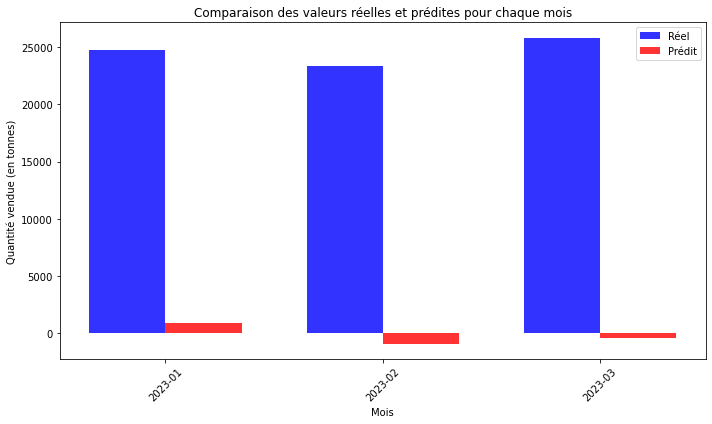

RMSE: 24794.282476967634
MSE: 614756443.5476643


In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les données
y_true = d23['QUANTITE_TM']
y_pred = d23['Predictions']
months = d23.index.strftime('%Y-%m')

# Créer la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres pour les valeurs réelles et prédites
bar_width = 0.35
opacity = 0.8
index = np.arange(len(months))
rects1 = ax.bar(index, y_true, bar_width, alpha=opacity, color='b', label='Réel')
rects2 = ax.bar(index + bar_width, y_pred, bar_width, alpha=opacity, color='r', label='Prédit')

# Ajouter des étiquettes, un titre et une légende
ax.set_xlabel('Mois')
ax.set_ylabel('Quantité vendue (en tonnes)')
ax.set_title('Comparaison des valeurs réelles et prédites pour chaque mois')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months, rotation=45)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


mse = mean_squared_error(d23['QUANTITE_TM'],d23['Predictions'])


# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

# Affichage des résultats
print(f"MSE: {mse}")
